## Pendahuluan

**Study Case: Memprediksi Jumlah Emas Yang Diekstraksi atau Diperoleh Dari Bijih Emas.**

Saat ini kita berhadapan langsung dengan permasalahan data science yang sesungguhnya dari bidang pertambangan emas yaitu perusahaan Zyfra.

Perusahaan ini bergerak di bidang pengembangan solusi efisien untuk industri berat. Dan kita diminta untuk membuat model yang bisa memprediksi jumlah emas yang diekstraksi atau diperoleh dari bijih emas. 

Dimana saat ini tersedia data terkait proses ekstraksi dan pemurnian bijih emas yang bisa kita gunakan. Dengan tujuan model ini diharapkan akan membantu terciptanya proses produksi yang lebih efisien dan menyingkirkan parameter-parameter yang tidak menghasilkan keuntungan. 

Untuk menyelesaikan tugas ini, kita akan melakukan langkah-langkah berikut:
- Mempersiapkan data yang tersedia
- Menjalankan analisis data
- Mengembangkan dan melatih model

Kita lanjut ke tahap berikutnya.

## Konten <a id='back'></a>

* [1. Pendahuluan](#intro)
* [2. Konten](#back)
* [3. Tahap 1](#first)
  * [3.1 Mempersiapkan Dataset](#cont_1)
    * [3.1.1 Memuat Library](#cont_2) 
    * [3.1.2 Memuat Dataset](#cont_3)
  * [3.2 Mengecek Duplikasi Data](#cont_4)
  * [3.3 Perbedaan Parameter Dataset Train dan Test](#cont_5)
  * [3.4 Mengecek Nilai yang Hilang](#cont_6)
  * [3.5 Memperbaiki Nilai yang Hilang](#cont_7)
  * [3.6 Melengkapi Dataset Test dengan Menggunakan Dataset Full ](#cont_8)
* [4. Tahap 2](#second)
  * [4.1 Analisis Data Eksplorasi (EDA)](#cont_9)
  * [4.2 Analisis Perolehan Emas](#cont_10)
  * [4.3 Perubahan Masing=Masing Konsentrat](#cont_11)
  * [4.4 Distribusi Ukuran Partikel Umpan](#cont_12)
  * [4.5 Distribusi Konsentrat Partikel](#cont_13)
  * [4.6 Memperbaiki Kualitas Data Train](#cont_14)
  * [4.7Memperbaiki Kualitas Data Train](#cont_15)
* [5. Tahap 3](#third)
  * [5.1 Model Machine Learning dalam Ekstraksi Bijih Emas](#cont_16)
  * [5.2 Evaluasi Fitur](#cont_17)
  * [5.3 Evaluasi Model Regresi Linier](#cont_18)
  * [5.4 Evaluasi Model Random Forest](#cont_19)
  * [5.5 Evaluasi Model Regresi K-Nearest Neighbours](#cont_20)
  * [5.6 Hasil Prediksi Dataset Test](#cont_21)
* [6. Tahap 4](#fourth)
  * [6.1 Kesimpulan Umum](#cont_23)

## Tahap 1

### Mempersiapkan Data

Tahap pertama yang perlu dilakukan adalah mempersiapkan dataset mulai dari memuat library yang diperlukan, memuat dataset , mengecek sampel data, mengecek nilai yang hilang, mengecek duplikat dan mengecek tipe data.

#### Memuat Library

Sebelumnya kita akan menggunakan beberapa library berikut:
- `Pandas`: Untuk manipulasi dan analisis data.
- `Scikit-learn`: Untuk pemodelan dan evaluasi model.
- `Matplotlib dan Seaborn`: Untuk visualisasi data.
- `NumPy`: Untuk operasi matematika.

In [41]:
# memuat modul
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import make_scorer
from sklearn.feature_selection import SelectKBest, f_regression

#### Memuat Dataset

Dataset yang kita punya berasal dari perusahaan secara mentah, terdiri dari dataset train, test dan full. Dataset test memiliki parameter yang tidak lengkap dikarenakan hasil perhitungan yang belum selesai akibat pengambilan data yang masih berlangsung.

In [42]:
# Memuat dataset train dari lokasi yang mungkin
train = ['gold_recovery_train.csv', '/datasets/gold_recovery_train.csv']

for dataset in train:
    try:
        train = pd.read_csv(dataset, parse_dates=['date'], index_col=['date'])
        break  # Jika berhasil, keluar dari loop
    except FileNotFoundError:
        pass  # Jika file tidak ditemukan, lanjut ke path berikutnya

# Pastikan dataset train telah terisi
if 'train' not in locals():
    print("File dataset train tidak ditemukan.")
else:
    print("Dataset train berhasil dimuat.")

Dataset train berhasil dimuat.


In [43]:
# menampilkan informasi dataset
print(train.info())

# menampilkan sampel dataset
train.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 16860 entries, 2016-01-15 00:00:00 to 2018-08-18 10:59:59
Data columns (total 86 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   final.output.concentrate_ag                         16788 non-null  float64
 1   final.output.concentrate_pb                         16788 non-null  float64
 2   final.output.concentrate_sol                        16490 non-null  float64
 3   final.output.concentrate_au                         16789 non-null  float64
 4   final.output.recovery                               15339 non-null  float64
 5   final.output.tail_ag                                16794 non-null  float64
 6   final.output.tail_pb                                16677 non-null  float64
 7   final.output.tail_sol                               16715 non-null  float64
 8   final.output.tail_au                     

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,123.819808,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,122.270188,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,117.988169,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


Dataset training memiliki 86 kolom dan 16860 baris yang terdiri dari data numerik dan datetime sebagai index.

In [44]:
# Memuat dataset test dari lokasi yang mungkin
test = ['gold_recovery_test.csv', '/datasets/gold_recovery_test.csv']

for dataset in test:
    try:
        test = pd.read_csv(dataset, parse_dates=['date'], index_col=['date'])
        break  # Jika berhasil, keluar dari loop
    except FileNotFoundError:
        pass  # Jika file tidak ditemukan, lanjut ke path berikutnya

# Pastikan dataset telah terisi
if 'test' not in locals():
    print("File dataset test tidak ditemukan.")
else:
    print("Dataset test berhasil dimuat.")

Dataset test berhasil dimuat.


In [45]:
# menampilkan informasi dataset
print(test.info())

# menampilkan sampel dataset
test.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5856 entries, 2016-09-01 00:59:59 to 2017-12-31 23:59:59
Data columns (total 52 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   primary_cleaner.input.sulfate               5554 non-null   float64
 1   primary_cleaner.input.depressant            5572 non-null   float64
 2   primary_cleaner.input.feed_size             5856 non-null   float64
 3   primary_cleaner.input.xanthate              5690 non-null   float64
 4   primary_cleaner.state.floatbank8_a_air      5840 non-null   float64
 5   primary_cleaner.state.floatbank8_a_level    5840 non-null   float64
 6   primary_cleaner.state.floatbank8_b_air      5840 non-null   float64
 7   primary_cleaner.state.floatbank8_b_level    5840 non-null   float64
 8   primary_cleaner.state.floatbank8_c_air      5840 non-null   float64
 9   primary_cleaner.state.floatbank8_c_level    5840 

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,-500.704369,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,-499.240168,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,-502.151509,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,-498.355873,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,-500.810606,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333


Dataset test memiliki 52 kolom dan 5856 baris yang terdiri dari data numerik dan datetime sebagai index.

In [46]:
# Memuat dataset full dari lokasi yang mungkin
full = ['gold_recovery_full.csv', '/datasets/gold_recovery_full.csv']

for dataset in full:
    try:
        full = pd.read_csv(dataset, parse_dates=['date'], index_col=['date'])
        break  # Jika berhasil, keluar dari loop
    except FileNotFoundError:
        pass  # Jika file tidak ditemukan, lanjut ke path berikutnya

# Pastikan dataset full telah terisi
if 'full' not in locals():
    print("File dataset full tidak ditemukan.")
else:
    print("Dataset full berhasil dimuat.")

Dataset full berhasil dimuat.


In [47]:
# menampilkan informasi dataset
print(full.info())

# menampilkan sampel dataset
full.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 22716 entries, 2016-01-15 00:00:00 to 2018-08-18 10:59:59
Data columns (total 86 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   final.output.concentrate_ag                         22627 non-null  float64
 1   final.output.concentrate_pb                         22629 non-null  float64
 2   final.output.concentrate_sol                        22331 non-null  float64
 3   final.output.concentrate_au                         22630 non-null  float64
 4   final.output.recovery                               20753 non-null  float64
 5   final.output.tail_ag                                22633 non-null  float64
 6   final.output.tail_pb                                22516 non-null  float64
 7   final.output.tail_sol                               22445 non-null  float64
 8   final.output.tail_au                     

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,123.819808,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,122.270188,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,117.988169,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


Dataset full memiliki 86 kolom dan 22716 baris yang terdiri dari data numerik dan datetime sebagai index.

### Mengecek Duplikasi Data

Kita cek duplikasi datanya, dengan melakukan `reset index` karena kita akan mengatur ulang dataframe.

In [48]:
# Menghapus duplikasi dan mengatur ulang indeks pada dataset train
train = train[~train.duplicated()]
train.reset_index(drop=True, inplace=True)

# Menghapus duplikasi dan mengatur ulang indeks pada dataset test
test = test[~test.duplicated()]
test.reset_index(drop=True, inplace=True)

# Menghapus duplikasi dan mengatur ulang indeks pada dataset full
full = full[~full.duplicated()]
full.reset_index(drop=True, inplace=True)

# Mengecek apakah masih ada duplikasi setelah dihapus
print("Jumlah duplikasi setelah reset_imdex:")
print("Train:", train.duplicated().sum())
print("Test:", test.duplicated().sum())
print("Full:", full.duplicated().sum())

Jumlah duplikasi setelah reset_imdex:
Train: 0
Test: 0
Full: 0


Sekarang sudah tidak terdapat lagi duplikasi data.

### Perbedaan Parameter Dataset Train dan Test

Disini kita akan melihat beberapa parameter-parameter yang tidak dimiliki dataset `test` dengan mengacu pada dataset `train`.


In [49]:
# parameter yang tidak ada pada dataset test
difference = list(set(train.columns)-set(test.columns))
sorted(difference)

['final.output.concentrate_ag',
 'final.output.concentrate_au',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_au',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_au',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'rougher.calculation.au_pb_ratio',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_au',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'rougher.output.tail_au',
 'rougher.output.ta

Berdasarkan hasil ini, nampaknya dataset test kekurangan tipe parameter output. Hal tersebut nampaknya hanya berisi input yang diberikan pada teknologi proses dan belum sempat diambil data outputnya.

### Mengecek Nilai yang Hilang

Kita lanjutkan cek nilai yang hilang.

In [50]:
# Persentase missing values untuk dataset train
train_miss = (train.isna().sum() / len(train) * 100).sort_values(ascending=False)
train_miss.head()

rougher.output.recovery              15.180480
rougher.output.tail_ag               13.262883
rougher.output.tail_sol              13.256946
rougher.output.tail_au               13.256946
secondary_cleaner.output.tail_sol    11.695559
dtype: float64

In [51]:
# persentase missing values untuk dataset test
test_miss = (test.isna().sum() / len(train) * 100).sort_values(ascending=False)
test_miss.head()

rougher.input.floatbank11_xanthate    2.060081
primary_cleaner.input.sulfate         1.757302
primary_cleaner.input.depressant      1.650439
rougher.input.floatbank10_sulfate     1.490145
primary_cleaner.input.xanthate        0.949893
dtype: float64

In [52]:
# persentase missing values untuk dataset full
full_miss = (full.isna().sum() / len(train) * 100).sort_values(ascending=False)
full_miss.head()

rougher.output.recovery               18.386369
rougher.output.tail_ag                16.118499
rougher.output.tail_sol               16.112562
rougher.output.tail_au                16.112562
rougher.input.floatbank11_xanthate    13.268820
dtype: float64

Dari semua dataset, terdapat nilai yang hilang, maka kita akan perbaiki nilai yang hilang ini.

### Memperbaiki Nilai yang Hilang

Disini kita akan memperbaikinya dengan `nilai median` untuk masing-masing parameter dikarenakan kita tidak mengetahui adanya outlier atau tidak.

In [53]:
# mengisi nilai yang hilang dengan nilai median-nya
imputer = SimpleImputer(strategy='median')

# mengisi nilai yang hilang untuk data train
train_imputed = imputer.fit_transform(train)
train_imputed = pd.DataFrame(train_imputed,columns=train.columns,index=train.index)

# mengisi nilai yang hilang untuk data test
test_imputed = imputer.fit_transform(test)
test_imputed = pd.DataFrame(test_imputed,columns=test.columns,index=test.index)

# mengisi nilai yang hilang untuk data full
full_imputed = imputer.fit_transform(full)
full_imputed = pd.DataFrame(full_imputed,columns=full.columns,index=full.index)

In [54]:
# mengecek kembali nilai yang hilang pada dataset train
train_imputed.isna().sum().sort_values()

final.output.concentrate_ag                           0
rougher.state.floatbank10_e_level                     0
rougher.state.floatbank10_e_air                       0
rougher.state.floatbank10_d_level                     0
rougher.state.floatbank10_d_air                       0
                                                     ..
primary_cleaner.state.floatbank8_c_air                0
primary_cleaner.state.floatbank8_b_level              0
primary_cleaner.state.floatbank8_b_air                0
rougher.calculation.floatbank11_sulfate_to_au_feed    0
secondary_cleaner.state.floatbank6_a_level            0
Length: 86, dtype: int64

In [55]:
# mengecek kembali nilai yang hilang pada dataset test
test_imputed.isna().sum().sort_values()

primary_cleaner.input.sulfate                 0
rougher.state.floatbank10_d_air               0
rougher.state.floatbank10_d_level             0
rougher.state.floatbank10_e_air               0
rougher.state.floatbank10_e_level             0
rougher.state.floatbank10_f_air               0
rougher.state.floatbank10_f_level             0
secondary_cleaner.state.floatbank2_a_air      0
secondary_cleaner.state.floatbank2_a_level    0
secondary_cleaner.state.floatbank2_b_air      0
secondary_cleaner.state.floatbank2_b_level    0
rougher.state.floatbank10_c_level             0
secondary_cleaner.state.floatbank3_a_air      0
secondary_cleaner.state.floatbank3_b_air      0
secondary_cleaner.state.floatbank3_b_level    0
secondary_cleaner.state.floatbank4_a_air      0
secondary_cleaner.state.floatbank4_a_level    0
secondary_cleaner.state.floatbank4_b_air      0
secondary_cleaner.state.floatbank4_b_level    0
secondary_cleaner.state.floatbank5_a_air      0
secondary_cleaner.state.floatbank5_a_lev

In [56]:
# mengecek kembali nilai yang hilang pada dataset full
full_imputed.isna().sum().sort_values()

final.output.concentrate_ag                           0
rougher.state.floatbank10_e_level                     0
rougher.state.floatbank10_e_air                       0
rougher.state.floatbank10_d_level                     0
rougher.state.floatbank10_d_air                       0
                                                     ..
primary_cleaner.state.floatbank8_c_air                0
primary_cleaner.state.floatbank8_b_level              0
primary_cleaner.state.floatbank8_b_air                0
rougher.calculation.floatbank11_sulfate_to_au_feed    0
secondary_cleaner.state.floatbank6_a_level            0
Length: 86, dtype: int64

Sekarang sudah tidak terdapat lagi nilai yang hilang pada dataset.

### Melengkapi Dataset Test dengan Menggunakan Dataset Full

Selanjutnya kita akan melengkapi parameter yang kurang pada dataset test menggunakan dataset full dengan mencarinya menggunakan index dataset test.

In [57]:
# mendupliasi dataset full dan membuang nama kolom yang sama dengan dataset test
temp = full_imputed.copy().drop(test_imputed.columns,axis=1)

# menggabungkan dataset temp dengan dataset test
test_imputed = pd.merge(test_imputed,temp,left_index=True,right_index=True,how='left')

# mengatur nama kolom agar sesuai dengan urutan nama kolom dataset train
test_imputed = test_imputed.loc[:,train_imputed.columns]
test_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5850 entries, 0 to 5849
Data columns (total 86 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   final.output.concentrate_ag                         5850 non-null   float64
 1   final.output.concentrate_pb                         5850 non-null   float64
 2   final.output.concentrate_sol                        5850 non-null   float64
 3   final.output.concentrate_au                         5850 non-null   float64
 4   final.output.recovery                               5850 non-null   float64
 5   final.output.tail_ag                                5850 non-null   float64
 6   final.output.tail_pb                                5850 non-null   float64
 7   final.output.tail_sol                               5850 non-null   float64
 8   final.output.tail_au                                5850 non-null   float64
 9

Saat ini kita berhasil menggabungkan dataset test dengan dataset full.

## Tahap 2

### Analisis Data Eksplorasi (EDA)

Kita akan melanjutkan dengan menggunakan EDA untuk memvisualisasikan parameter-parameter yang ada pada data yang telah kita siapkan sebelumnya.

### Analisis Perolehan Emas

Tahap awal kita akan melakukan perhitungan untuk analisa perolehan emas berdasarkan data yang sudah kita siapkan sebelumnya dengan rumus perolehan emas.

In [58]:
# menghitung perolehan emas dari bijih emas
# formula = Cx(F-T)/Fx(C-T)*100
C = train_imputed['rougher.output.concentrate_au']
F = train_imputed['rougher.input.feed_au']
T = train_imputed['rougher.output.tail_au']

# membuat perhitungan perolehan emas manual
gain_calc = (C*(F-T))/(F*(C-T))*100

# mengecek distribusi gain_calc
gain_calc.describe()

count    1.572900e+04
mean              NaN
std               NaN
min              -inf
25%      7.983188e+01
50%      8.550670e+01
75%      9.074466e+01
max               inf
dtype: float64

Hasil menunjukan nilai NaN, -inf dan inf. Kita akan menghilangkannya nanti, mari kita gabungkan data recovery dan calculation.

In [59]:
# menggabungkan perolehan recovery dengan perolehan kalkulasi
merge = pd.concat([train_imputed['rougher.output.recovery'],gain_calc],axis=1)
merge.columns = ['recovery','calculation']

In [60]:
# mengganti nilai inf dan -inf dengan NaN
merge['calculation'] = merge['calculation'].replace([np.inf,-np.inf], np.nan)

# menghapus semua missing values
merge.dropna(inplace=True)

# mengecek kembali distribusi kolom manual.count
merge.describe()

,recovery,calculation
count,15685.000000,15685.000000
mean,82.647490,32.488747
std,14.431013,3198.714991
min,0.000000,-366924.161290
25%,80.430224,79.900532
50%,85.235997,85.522610
75%,89.709795,90.753923
max,100.000000,13802.071756


In [61]:
# menghitung skor MAE antara hasil manual dengan hasil recovery
MAE_score = mean_absolute_error(merge['recovery'],merge['calculation'])
print('MAE Score -->', MAE_score)

MAE Score --> 56.88778522080119


Setelah penggabungan data dan menghilangkan nilai yang tidak diinginkan. Nilai pada `MAE Score` menunjukan perbedaan yang cukup tinggi, kita tidak bisa menggunakanya sebagai fitur.

### Perubahan Masing-Masing Konsentrat

Disini kita akan mengetahui perubahan konsentrat untuk masing-logam Au, Ag, Pb berdasarkan prosesnya stage yang dilaluinya.



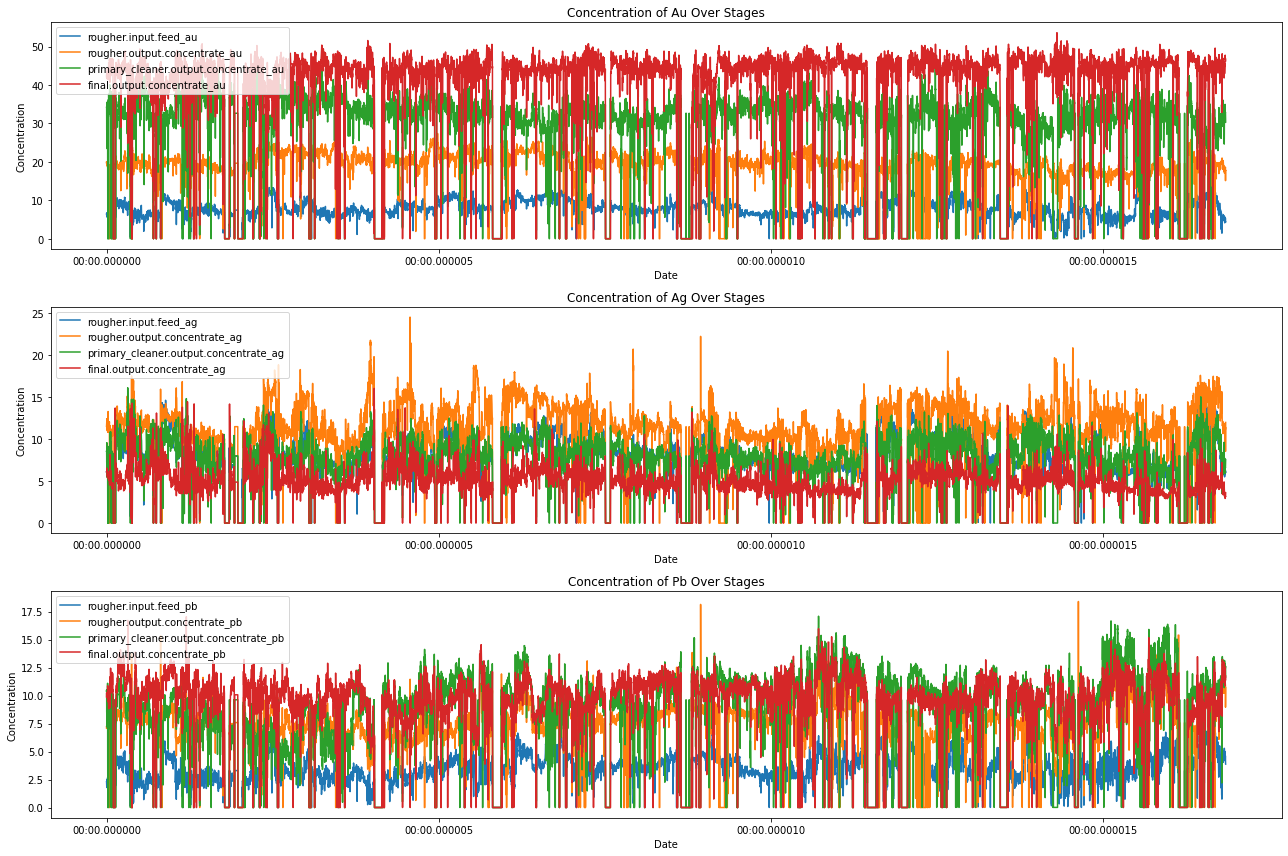

In [62]:
# Mengonversi indeks menjadi tipe datetim
train_imputed.index = pd.to_datetime(train_imputed.index)

# Memilih kolom konsentrasi Logam Au, Ag, dan Pb
au_columns = ['rougher.input.feed_au', 'rougher.output.concentrate_au',
              'primary_cleaner.output.concentrate_au', 'final.output.concentrate_au']

ag_columns = ['rougher.input.feed_ag', 'rougher.output.concentrate_ag',
              'primary_cleaner.output.concentrate_ag', 'final.output.concentrate_ag']

pb_columns = ['rougher.input.feed_pb', 'rougher.output.concentrate_pb',
              'primary_cleaner.output.concentrate_pb', 'final.output.concentrate_pb']

# Menggambar grafik perubahan konsentrasi Logam Au, Ag, dan Pb berdasarkan stage
plt.figure(figsize=(18, 12))

# Plot untuk Logam Au
plt.subplot(3, 1, 1)
for column in au_columns:
    sns.lineplot(data=train_imputed, y=column, x=train_imputed.index, label=column)
plt.legend(loc='upper left')
plt.title('Concentration of Au Over Stages')
plt.xlabel('Date')
plt.ylabel('Concentration')

# Plot untuk Logam Ag
plt.subplot(3, 1, 2)
for column in ag_columns:
    sns.lineplot(data=train_imputed, y=column, x=train_imputed.index, label=column)
plt.legend(loc='upper left')
plt.title('Concentration of Ag Over Stages')
plt.xlabel('Date')
plt.ylabel('Concentration')

# Plot untuk Logam Pb
plt.subplot(3, 1, 3)
for column in pb_columns:
    sns.lineplot(data=train_imputed, y=column, x=train_imputed.index, label=column)
plt.legend(loc='upper left')
plt.title('Concentration of Pb Over Stages')
plt.xlabel('Date')
plt.ylabel('Concentration')

plt.tight_layout()
plt.show()

- Disini konsentrat `emas - Au` memiliki hasil yang cukup baik dan stabil dimana setiap stage selalu mengalami peningkatan konsentrat dan konsentrat tertinggi pada konsentrat final.

- Disini konsentrat `perak - Ag` memiliki hasil menunjukan penurunan konsentrat setiap stage setelah melalui pemurnian primer. Konsentrat meningkat dan tertinggi pada konsentrat flotasi.

- Disini konsentrat `timbal - Pb` memiliki hasil yang cukup baik dimana setiap stage selalui mengalami peningkatan konsentrat dan konsentrat tertinggi pada konsentrat primer.

### Distribusi Ukuran Partikel Umpan

Sekarang kita akan mengetahui distribusi ukuran partikel umpan (feed) pada dataset train dan test menggunkan kdeplot.

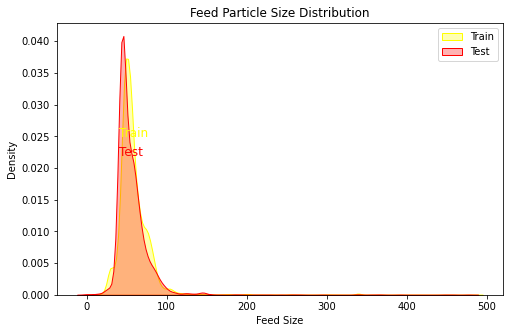

In [63]:
# membuat grafik plot distribusi partikel umpan
plt.figure(figsize=(8,5))
sns.kdeplot(data=train_imputed['rougher.input.feed_size'], alpha=0.3, fill=True, label='Train', color='yellow')
sns.kdeplot(data=test_imputed['rougher.input.feed_size'], alpha=0.3, fill=True, label='Test', color='red')

# Menambahkan anotasi
plt.text(40, 0.025, 'Train', color='yellow', fontsize=12)
plt.text(40, 0.022, 'Test', color='red', fontsize=12)

plt.legend()
plt.xlabel('Feed Size')
plt.title('Feed Particle Size Distribution')
plt.show()

Dari grafik menunjukan distribusi variasi ukuran partikel umpan (feed) yang seragam yang berada diantara ukuran 30 hingga 110 sehingga bisa dijadikan acuan untuk model machine learning.

### DIstribusi Konsentrat Partikel

Kita akan lanjutkan dengan mengecek outlier pada distribusi konsentrat di setiap stage.

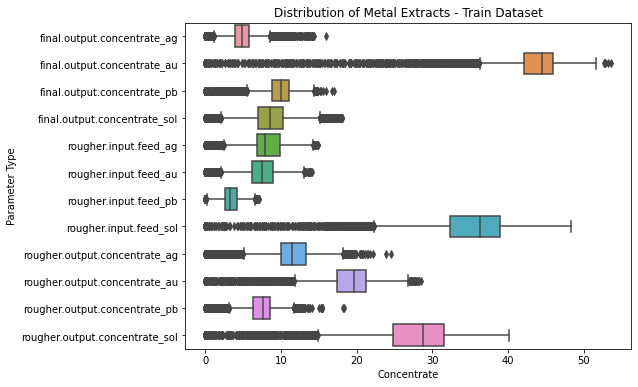

In [64]:
# nama kolom yang akan dicek
columns = [
    'final.output.concentrate_ag',
    'final.output.concentrate_au',
    'final.output.concentrate_pb',
    'final.output.concentrate_sol',
    'rougher.input.feed_ag',
    'rougher.input.feed_au',
    'rougher.input.feed_pb',
    'rougher.input.feed_sol',
    'rougher.output.concentrate_ag',
    'rougher.output.concentrate_au',
    'rougher.output.concentrate_pb',
    'rougher.output.concentrate_sol',
]

# membuat boxplot untuk masing-masing logam dan stagenya untuk dataset train
plt.figure(figsize=(8,6))
sns.boxplot(data=train_imputed[columns], orient='h')
plt.xlabel('Concentrate')
plt.ylabel('Parameter Type')
plt.title('Distribution of Metal Extracts - Train Dataset')
plt.show()

Bisa kita lihat pada grafik boxplot dataset train diatas terdapat 4 stage yang memiliki outliers terbanyak yaitu `final.output.concentrate_au, rougher.output.concentrate_au, rougher.input.feed_sol, rougher.output.concentrate_sol`.

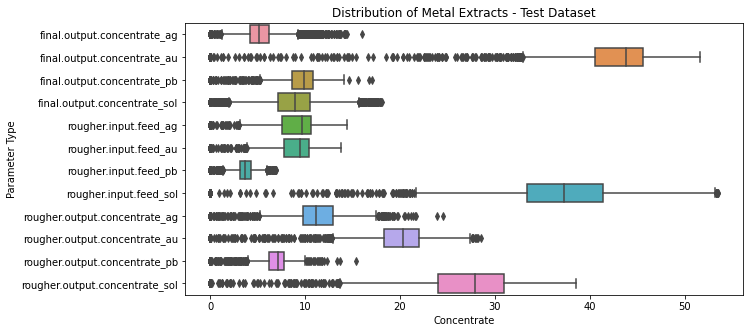

In [65]:
# membuat boxplot untuk masing-masing logam dan stagenya untuk dataset test
plt.figure(figsize=(10,5))
sns.boxplot(data=test_imputed[columns],orient='h')
plt.xlabel('Concentrate')
plt.ylabel('Parameter Type')
plt.title('Distribution of Metal Extracts - Test Dataset')
plt.show()

isa kita lihat pada grafik boxplot dataset test diatas terdapat 4 stage yang memiliki outliers terbanyak yaitu `final.output.concentrate_au, rougher.output.concentrate_au, rougher.input.feed_sol, rougher.output.concentrate_sol`.

### Memperbaiki Kualitas Data Train

Selanjutnya kita hilangkan outliers tersebut dengan menghitung lower limit, kemudian memfilter dataset.

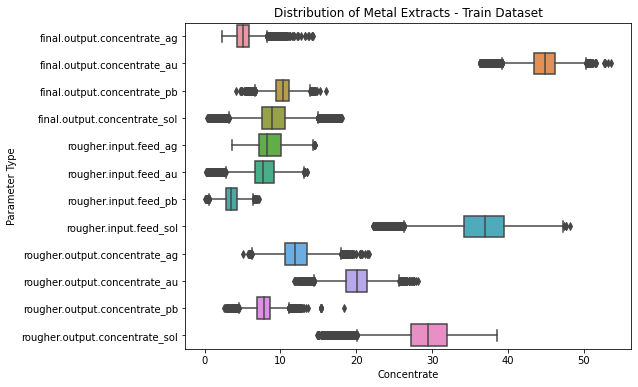

In [66]:
# menghitung Limit Lower dari kolom 'final.output.concentrate_au'
Q1_final = train_imputed['final.output.concentrate_au'].quantile(0.25)
Q3_final = train_imputed['final.output.concentrate_au'].quantile(0.75)
IQR_final = Q3_final - Q1_final
limit_lower_final = Q1_final - (1.5*IQR_final)

# menghitung Limit Lower dari kolom 'rougher.output.concentrate_au'
Q1_rough_au = train_imputed['rougher.output.concentrate_au'].quantile(0.25)
Q3_rough_au = train_imputed['rougher.output.concentrate_au'].quantile(0.75)
IQR_rough_au = Q3_rough_au - Q1_rough_au
limit_lower_rough_au = Q1_rough_au - (1.5*IQR_rough_au)

# menghitung Limit Lower dari kolom 'rougher.input.feed_sol'
Q1_rough_in_sol = train_imputed['rougher.input.feed_sol'].quantile(0.25)
Q3_rough_in_sol = train_imputed['rougher.input.feed_sol'].quantile(0.75)
IQR_rough_in_sol = Q3_rough_in_sol - Q1_rough_in_sol
limit_lower_rough_in_sol = Q1_rough_in_sol - (1.5*IQR_rough_in_sol)

# menghitung Limit Lower dari kolom 'rougher.output.concentrate_sol',
Q1_rough_out_sol = train_imputed['rougher.output.concentrate_sol'].quantile(0.25)
Q3_rough_out_sol = train_imputed['rougher.output.concentrate_sol'].quantile(0.75)
IQR_rough_out_sol = Q3_rough_out_sol - Q1_rough_out_sol
limit_lower_rough_out_sol = Q1_rough_out_sol - (1.5*IQR_rough_out_sol)

# membuang outlier pada dataset train
train_imputed = train_imputed[train_imputed['final.output.concentrate_au'] >= limit_lower_final]
train_imputed = train_imputed[train_imputed['rougher.output.concentrate_au'] >= limit_lower_rough_au]
train_imputed = train_imputed[train_imputed['rougher.input.feed_sol'] >= limit_lower_rough_in_sol]
train_imputed = train_imputed[train_imputed['rougher.output.concentrate_sol'] >= limit_lower_rough_out_sol]

# menampilkan boxplot untuk masing-masing logam dan stagenya untuk dataset train
plt.figure(figsize=(8,6))
sns.boxplot(data=train_imputed[columns],orient='h')
plt.xlabel('Concentrate')
plt.ylabel('Parameter Type')
plt.title('Distribution of Metal Extracts - Train Dataset')
plt.show()

Outliers sudah bisa kita hilangkan dari dataset train.

### Memperbaiki Kualitas Data Test

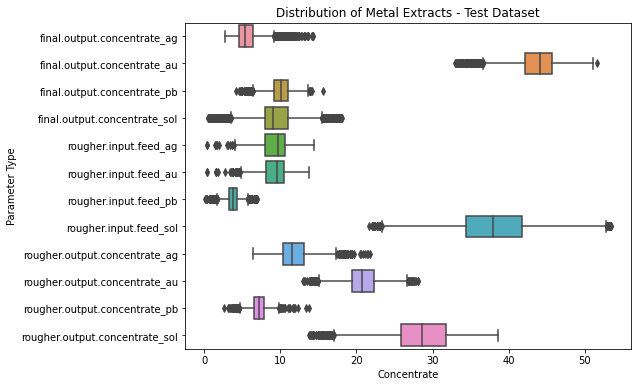

In [67]:
# menghitung Limit Lower dari kolom 'final.output.concentrate_au'
Q1_final = test_imputed['final.output.concentrate_au'].quantile(0.25)
Q3_final = test_imputed['final.output.concentrate_au'].quantile(0.75)
IQR_final = Q3_final - Q1_final
limit_lower_final = Q1_final - (1.5*IQR_final)

# menghitung Limit Lower dari kolom 'rougher.output.concentrate_au'
Q1_rough_au = test_imputed['rougher.output.concentrate_au'].quantile(0.25)
Q3_rough_au = test_imputed['rougher.output.concentrate_au'].quantile(0.75)
IQR_rough_au = Q3_rough_au - Q1_rough_au
limit_lower_rough_au = Q1_rough_au - (1.5*IQR_rough_au)

# menghitung Limit Lower dari kolom 'rougher.input.feed_sol'
Q1_rough_in_sol = test_imputed['rougher.input.feed_sol'].quantile(0.25)
Q3_rough_in_sol = test_imputed['rougher.input.feed_sol'].quantile(0.75)
IQR_rough_in_sol = Q3_rough_in_sol - Q1_rough_in_sol
limit_lower_rough_in_sol = Q1_rough_in_sol - (1.5*IQR_rough_in_sol)

# menghitung Limit Lower dari kolom 'rougher.output.concentrate_sol',
Q1_rough_out_sol = test_imputed['rougher.output.concentrate_sol'].quantile(0.25)
Q3_rough_out_sol = test_imputed['rougher.output.concentrate_sol'].quantile(0.75)
IQR_rough_out_sol = Q3_rough_out_sol - Q1_rough_out_sol
limit_lower_rough_out_sol = Q1_rough_out_sol - (1.5*IQR_rough_out_sol)

# membuang outlier pada dataset test
test_imputed = test_imputed[test_imputed['final.output.concentrate_au'] >= limit_lower_final]
test_imputed = test_imputed[test_imputed['rougher.output.concentrate_au'] >= limit_lower_rough_au]
test_imputed = test_imputed[test_imputed['rougher.input.feed_sol'] >= limit_lower_rough_in_sol]
test_imputed = test_imputed[test_imputed['rougher.output.concentrate_sol'] >= limit_lower_rough_out_sol]

# menampilkan boxplot untuk masing-masing logam dan stagenya untuk dataset test
plt.figure(figsize=(8,6))
sns.boxplot(data=test_imputed[columns],orient='h')
plt.xlabel('Concentrate')
plt.ylabel('Parameter Type')
plt.title('Distribution of Metal Extracts - Test Dataset')
plt.show()

Outliers sudah bisa kita hilangkan dari dataset test.

## Tahap 3

### Model Machine Learning dalam Ekstraksi Bijih Emas

Kita akan melakukan pembuatan model machine learning serta mengevaluasi model tersebut dengan menggunakan teknik cross-validation pada fungsi SMAPE (Symmetric Mean Absolute Percentage Error).

In [68]:
# fungsi untuk menghitung SMAPE (symmetric mean absolute percentage error)
def smape_score(y_true,y_pred):
    # membuat dataframe
    y_true = pd.DataFrame(y_true)
    y_pred = pd.DataFrame(y_pred)
    # mereset index
    y_true = y_true.reset_index(drop=True)
    y_pred = y_pred.reset_index(drop=True)
    # mendefinsikan variabel rough dan final
    y_true_rough = y_true.iloc[:,0]
    y_pred_rough = y_pred.iloc[:,0]
    y_true_final = y_true.iloc[:,1]
    y_pred_final = y_pred.iloc[:,1]

    # for loop untuk menghitung value rough
    temp_rough = []
    for i in range(len(y_pred)):
        # menghitung value tiap baris
        value = (abs(y_true_rough[i] - y_pred_rough[i]))/((abs(y_true_rough[i])+abs(y_pred_rough[i]))/2)
        # menambahkan hasil hitungan kedalam temp_rough
        temp_rough.append(value)
    # menghitung skor SMAPE
    score_rough = sum(temp_rough)/len(y_true)*100

    # for loop untuk menghitung value final
    temp_final = []
    for i in range(len(y_pred)):
        # menghitung value tiap baris
        value = (abs(y_true_final[i] - y_pred_final[i]))/((abs(y_true_final[i])+abs(y_pred_final[i]))/2)
        # menambahkan hasil hitungan kedalam temp_final
        temp_final.append(value)
    # menghitung skor SMAPE
    score_final = sum(temp_final)/len(y_true)*100

    # menghitung skor gabungan
    final_smape = score_rough*0.25 + score_final*0.75

    # mengembalikan skor SMAPE
    return final_smape

### Evaluasi Fitur

Kita lanjutkan untuk melakukan seleksi fitur untuk mengefektifkan kalkulasi dan menghemat waktu. Kita tampilkan kembali semua parameter yang ada pada dataset full.

In [69]:
# mengecek nama parameter
full_imputed.columns

Index(['final.output.concentrate_ag', 'final.output.concentrate_pb',
       'final.output.concentrate_sol', 'final.output.concentrate_au',
       'final.output.recovery', 'final.output.tail_ag', 'final.output.tail_pb',
       'final.output.tail_sol', 'final.output.tail_au',
       'primary_cleaner.input.sulfate', 'primary_cleaner.input.depressant',
       'primary_cleaner.input.feed_size', 'primary_cleaner.input.xanthate',
       'primary_cleaner.output.concentrate_ag',
       'primary_cleaner.output.concentrate_pb',
       'primary_cleaner.output.concentrate_sol',
       'primary_cleaner.output.concentrate_au',
       'primary_cleaner.output.tail_ag', 'primary_cleaner.output.tail_pb',
       'primary_cleaner.output.tail_sol', 'primary_cleaner.output.tail_au',
       'primary_cleaner.state.floatbank8_a_air',
       'primary_cleaner.state.floatbank8_a_level',
       'primary_cleaner.state.floatbank8_b_air',
       'primary_cleaner.state.floatbank8_b_level',
       'primary_cleaner.state

Dapat dicermati bahwa tidak terdapat indikasi perubahan data.

In [70]:
# membagi dataset menjadi fitur dan target untuk data train
y1 = train_imputed[['rougher.output.concentrate_au', 'final.output.concentrate_au']].copy()
X1 = train_imputed.drop(['rougher.output.concentrate_au', 'final.output.concentrate_au'], axis=1)

# membagi dataset menjadi fitur dan target untuk data test
y2 = test_imputed[['rougher.output.concentrate_au', 'final.output.concentrate_au']].copy()
X2 = test_imputed.drop(['rougher.output.concentrate_au', 'final.output.concentrate_au'], axis=1)

# menskalakan fitur menggunakan standard scaler
scaler = StandardScaler()
X1 = pd.DataFrame(scaler.fit_transform(X1), columns=X1.columns)
X2 = pd.DataFrame(scaler.transform(X2), columns=X2.columns)

Disini kita akan menggunakan SelectKBest dari scikit-learn untuk melakukan scoring fitur terhadap target dan menyeleksinya berdasarkan skor tertinggi.

In [71]:
# menyeleksi fitur yang terbaik menggunakan data train
# hubungan fitur dengan konsentrat rough
selector = SelectKBest(score_func=f_regression,k=10)
X_selected = selector.fit_transform(X1, y1.iloc[:,0])
feature_scores = selector.scores_
data = []
for score, col in enumerate(X1.columns):
    data.append([col,feature_scores[score]])
rough_col = pd.DataFrame(data,columns=['parameter','score']).sort_values(by='score',ascending=False).head(20)
rough_col

,parameter,score
44,rougher.output.concentrate_sol,17245.123802
46,rougher.output.tail_ag,5996.175734
49,rougher.output.tail_au,4037.409922
7,final.output.tail_au,3594.944720
19,primary_cleaner.output.tail_au,3034.010900
37,rougher.input.feed_au,2643.524806
36,rougher.input.feed_sol,2077.497469
48,rougher.output.tail_sol,2072.160575
2,final.output.concentrate_sol,1899.582550
74,secondary_cleaner.state.floatbank4_a_air,1405.753269


In [72]:
# menyeleksi fitur yang terbaik menggunakan data train
# hubungan fitur dengan konsentrat final
selector = SelectKBest(score_func=f_regression,k=10)
X_selected = selector.fit_transform(X1, y1.iloc[:,1])
feature_scores = selector.scores_
data = []
for score, col in enumerate(X1.columns):
    data.append([col,feature_scores[score]])
final_col = pd.DataFrame(data,columns=['parameter','score']).sort_values(by='score',ascending=False).head(20)
final_col

,parameter,score
0,final.output.concentrate_ag,11923.620487
12,primary_cleaner.output.concentrate_ag,1838.299348
1,final.output.concentrate_pb,1377.087590
36,rougher.input.feed_sol,807.603138
51,rougher.state.floatbank10_a_level,776.021373
34,rougher.input.feed_rate,724.459773
15,primary_cleaner.output.concentrate_au,660.307843
32,rougher.input.feed_ag,656.273557
49,rougher.output.tail_au,552.329335
7,final.output.tail_au,531.081504


Dari tabel diatas bisa terlihat 20 fitur yang memiliki skor tertinggi untuk target rough maupun target final. Mari kita ambil fitur-fitur tersebut.

In [73]:
# mengambil 20 nama kolom terbaik dari masing-masing grup dan menggabungkanya
set1 = rough_col['parameter'].to_list()
set2 = final_col['parameter'].to_list()
final_col = list(set(set1+set2))
print('Jumlah fitur sekarang -->', len(final_col))

Jumlah fitur sekarang --> 32


Disini kita filter filter dataset train dan test menggunakan nama kolom final_col yang terpilih.

In [74]:
# seleksi akhir fitur X1 dan X2
X1 = X1.loc[:,final_col]
X2 = X2.loc[:,final_col]

### Evaluasi Model Regresi Linier

Kita akan mencoba evaluasi model machine learning menggunakan regresi linier.

In [75]:
# membagi dataset train menjadi dua yaitu untuk training(75%) dan validasi(25%)
X_train, X_valid, y_train, y_valid = train_test_split(X1,y1,random_state=12345, test_size=0.25)

# membuat model linier regresi
linreg = LinearRegression()

# melatih model
linreg.fit(X_train,y_train)

# membuat berdasarkan model linier regresi
y_pred = pd.DataFrame(linreg.predict(X_valid),columns=['rough','final'])
y_pred.head()

,rough,final
0,19.261174,44.823688
1,20.486024,44.426762
2,22.399946,44.319322
3,20.786373,43.787379
4,22.512804,43.637175


In [76]:
# menghitung skor smape final
score = smape_score(y_valid,y_pred)

# menampilkan skor smape final
print('Final Score without Cross Validation (SMAPE) -->',score.round(2),'%')

Final Score without Cross Validation (SMAPE) --> 2.16 %


In [77]:
# menjadikan fungsi smape_score menjadi nilai skor cross validation
sMAPE = make_scorer(smape_score)

# menggunakan cross valiadtion
linreg_score = cross_val_score(linreg,X1,y1,cv=5,scoring=sMAPE).mean()
print('Cross Validation (SMAPE-Linreg) -->',linreg_score.round(2),'%')

Cross Validation (SMAPE-Linreg) --> 2.63 %


Kita dapat melihat untuk model machine learning menggunakan regresi linier menghasilkan skor SMAPE yang hampir sama, baik without cross-validation maupun cross-validation yang berkisar pada 2%.

### Evaluasi Model Random Forest

Dengan cara yang sama kita akan mencoba evaluasi model machine learning menggunakan random forest regressor.

In [78]:
# menguji performa model random forest dengan `n_estimators=1~20` dan kedalaman `max_depth=1-5`
# variabel penampungan
best_depth = 10000
best_trees = 10000
best_smape = 10000

# membuat for loop model
for tree in range(1,21,5):
    for depth in range(1,6):
        random_forest = RandomForestRegressor(n_estimators=tree,max_depth=depth,random_state=12345)
        random_forest.fit(X_train,y_train)
        y_pred = random_forest.predict(X_valid)
        smape_score = cross_val_score(random_forest,X1,y1,cv=5,scoring=sMAPE).mean()
        if smape_score < best_smape:
            best_depth = depth
            best_trees = tree
            best_smape = smape_score

# menampilkan hasil
print('Cross Validation (SMAPE-random_forest) -->','depth:',best_depth,'tree:',best_trees,'SMAPE:',best_smape.round(2),'%')

Cross Validation (SMAPE-random_forest) --> depth: 5 tree: 16 SMAPE: 3.9 %


Kita memperoleh bahwa menggunakan random forest regressor akan menghasilkan skor cross-validation SMAPE terbaik sebesar 3.9% menggunakan tree: 16 dan depth: 5.

### Evaluasi Model Regresi K-Nearest Neighbors

Dengan cara yang sama kita akan mencoba evaluasi model machine learning menggunakan K-Nearest regressor.

In [79]:
# menguji performa model KNN dengan `n_neighbors=1~30`
# variabel penampungan
best_n = 10000
best_smape = 10000
# membuat for loop model
for n in range(1,31):
    KNN = KNeighborsRegressor(n_neighbors=n)
    KNN.fit(X_train,y_train)
    y_pred = KNN.predict(X_valid)
    smape_score = cross_val_score(KNN,X1,y1,cv=5,scoring=sMAPE).mean()
    if smape_score < best_smape:
        best_n = n
        best_smape = smape_score

# menampilkan hasil
print('Cross Validation (SMAPE-KNN) -->','n:',best_n,'SMAPE:',best_smape.round(2),'%')

Cross Validation (SMAPE-KNN) --> n: 18 SMAPE: 3.77 %


Bisa kita peroleh bahwa menggunakan K-Nearest regressor akan menghasilkan skor cross-validation SMAPE terbaik sebesar 3.77% menggunakan n_neighbors: 18

Dari ketiga model machine learning diperoleh model terbaik yaitu `regresi liner kemudian K-Nearest regressor dan random forest regressor`.

### Hasil Prediksi Dataset Test

Disini kita akan melatih model terbaik regresi linier menggunakan dataset train kemudian melakukan prediksi menggunakan dataset test. Tidak lupa kita akan menghitung skor cross-validation SMAPE.

In [80]:
# melatih model terbaik menggunakan dataset train
best_model = LinearRegression()
best_model.fit(X1,y1)

# hasil prediksi menggunakan model terbaik
y_pred = best_model.predict(X2)

# menghitung skor SMAPE
linreg_score = cross_val_score(best_model,X2,y2,cv=5,scoring=sMAPE).mean()
print('Cross Validation (SMAPE-best_model) -->',linreg_score.round(2),'%')

Cross Validation (SMAPE-best_model) --> 3.13 %


Bisa kita lihat skor cross-validation SMAPE untuk dataset test berkisar 3.13%, bisa kita katakan cukup baik untuk bisa mempertahankan skor yang rendah.

## Tahap 4

### Kesimpulan Umum

Proses ekstraksi dan pemurnian emas melibatkan tahap Pra-pemrosesan Data dan Analisis Data Eksplorasi (EDA) serta dilanjutkan pelatihan model. Kesimpulan dari proyek ini meliputi:

1. Dataset test memiliki parameter yang hilang, khususnya output karena pengamatan belum selesai. Dataset test telah dilengkapi menggunakan dataset full.
2. Konsentrasi logam Au dan Pb meningkat seiring proses teknologi, sementara Ag mengalami penurunan setelah pemurnian primer.
3. Distribusi ukuran partikel umpan pada dataset train dan test memiliki variasi yang serupa, memudahkan model machine learning.
4. Distribusi konsentrat pada setiap proses teknologi menghasilkan outlier pada beberapa parameter, yang dapat menyulitkan model machine learning.
5. Evaluasi fitur model dapat mereduksi fitur dari 86 menjadi 32, meningkatkan efisiensi.
6. Model machine learning seperti regresi linier, random forest, dan K-Nearest Neighbors diuji. Regresi linier memberikan hasil terbaik dengan skor SMAPE terendah.
7. Hasil prediksi dataset test menggunakan model terbaik menunjukkan skor SMAPE sebesar 3.13%.